In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import community.community_louvain as community_louvain
import seaborn as sns

# Setup visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Analisis Jaringan Pertemanan Media Sosial")
print("Studi Kasus: Jaringan Pertemanan di Kampus")
print()

Analisis Jaringan Pertemanan Media Sosial
Studi Kasus: Jaringan Pertemanan di Kampus



In [5]:
# Buat graf kosong
G = nx.Graph()

# Daftar mahasiswa
mahasiswa = [
    "Romeo", "Juliet", "Opah", "Rapunzel", "Megatron", "Thor", "Shinchan", "Ariel",
    "Parker", "Shrek", "Elsa", "McQueen", "Luffy", "Spongebob", "Bahlila", "Naruto",
    "Woody", "Levi", "Luna", "Shizuka"
]

# Tambahkan nodes
G.add_nodes_from(mahasiswa)

# Definisikan relasi pertemanan
pertemanan = [
    # Cluster Anime Lovers
    ("Naruto", "Luffy"), ("Naruto", "Shinchan"), ("Naruto", "Levi"),
    ("Luffy", "Shinchan"), ("Luffy", "Levi"), ("Shinchan", "Levi"),
    ("Levi", "Shizuka"), ("Shizuka", "Shinchan"),

    # Cluster Disney Fans
    ("Elsa", "Ariel"), ("Elsa", "Rapunzel"), ("Elsa", "Woody"),
    ("Ariel", "Rapunzel"), ("Ariel", "Woody"), ("Rapunzel", "Woody"),
    ("Rapunzel", "Luna"),

    # Cluster Action Heroes
    ("Thor", "Megatron"), ("Thor", "Parker"), ("Thor", "McQueen"),
    ("Megatron", "Parker"), ("Parker", "McQueen"),

    # Cluster Comedy Squad
    ("Spongebob", "Shrek"), ("Spongebob", "Bahlila"), ("Shrek", "Bahlila"),
    ("Shrek", "Opah"),

    # Classic Romance
    ("Romeo", "Juliet"),

    # Bridge connections
    ("Shinchan", "Spongebob"), ("Luna", "Parker"), ("McQueen", "Woody"),
    ("Naruto", "Thor"), ("Opah", "Romeo"), ("Juliet", "Elsa"), ("Bahlila", "Luffy"),
]

# Tambahkan edges
G.add_edges_from(pertemanan)

print("Graf berhasil dibuat")
print(f"Total mahasiswa: {G.number_of_nodes()}")
print(f"Total pertemanan: {G.number_of_edges()}")
print(f"Status koneksi: {'Terhubung' if nx.is_connected(G) else 'Terputus'}")
print()

Graf berhasil dibuat
Total mahasiswa: 20
Total pertemanan: 32
Status koneksi: Terhubung



In [6]:
print("Analisis Popularitas (Degree Centrality)")

# Hitung degree setiap node
degrees = dict(G.degree())
degree_centrality = nx.degree_centrality(G)
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Mahasiswa dengan Teman Terbanyak:")
for i, (nama, jumlah_teman) in enumerate(sorted_degrees[:5]):
    centrality_score = degree_centrality[nama]
    print(f"   {nama}: {jumlah_teman} teman (score: {centrality_score:.3f})")

print(f"Rata-rata jumlah teman: {np.mean(list(degrees.values())):.2f}")
print(f"Median jumlah teman: {np.median(list(degrees.values())):.1f}")

# Distribusi degree
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = Counter(degree_sequence)
print("Distribusi teman:")
for deg, count in sorted(degree_count.items()):
    print(f"   {count} orang punya {deg} teman")
print()

Analisis Popularitas (Degree Centrality)
Top 5 Mahasiswa dengan Teman Terbanyak:
   Shinchan: 5 teman (score: 0.263)
   Rapunzel: 4 teman (score: 0.211)
   Thor: 4 teman (score: 0.211)
   Parker: 4 teman (score: 0.211)
   Elsa: 4 teman (score: 0.211)
Rata-rata jumlah teman: 3.20
Median jumlah teman: 3.0
Distribusi teman:
   6 orang punya 2 teman
   5 orang punya 3 teman
   8 orang punya 4 teman
   1 orang punya 5 teman



In [7]:
print("Analisis Bridge Person (Betweenness Centrality)")

# Hitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Penghubung Antar Kelompok:")
for i, (nama, score) in enumerate(sorted_betweenness[:5]):
    print(f"   {nama}: score {score:.3f}")

print("Bridge person sering muncul di jalur terpendek antar orang")
print("Mereka penting untuk menjaga konektivitas jaringan")
print()

Analisis Bridge Person (Betweenness Centrality)
Top 5 Penghubung Antar Kelompok:
   Thor: score 0.358
   Naruto: score 0.338
   McQueen: score 0.204
   Woody: score 0.181
   Elsa: score 0.163
Bridge person sering muncul di jalur terpendek antar orang
Mereka penting untuk menjaga konektivitas jaringan



In [8]:
print("Analisis Jalur Terpendek (Shortest Path)")

# Contoh pencarian jalur terpendek
orang1, orang2 = "Romeo", "Luffy"

if nx.has_path(G, orang1, orang2):
    jalur = nx.shortest_path(G, orang1, orang2)
    panjang = len(jalur) - 1

    print(f"Jalur dari {orang1} ke {orang2}:")
    print(f"   {' -> '.join(jalur)}")
    print(f"   Derajat perpisahan: {panjang} langkah")
else:
    print(f"Tidak ada jalur antara {orang1} dan {orang2}")

# Statistik jaringan
avg_path_length = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)

print(f"Rata-rata derajat perpisahan: {avg_path_length:.2f}")
print(f"Diameter jaringan: {diameter}")
print()

Analisis Jalur Terpendek (Shortest Path)
Jalur dari Romeo ke Luffy:
   Romeo -> Opah -> Shrek -> Bahlila -> Luffy
   Derajat perpisahan: 4 langkah
Rata-rata derajat perpisahan: 3.23
Diameter jaringan: 6



In [9]:
print("Analisis Clustering Coefficient")

# Hitung clustering coefficient
clustering = nx.clustering(G)
avg_clustering = nx.average_clustering(G)
transitivity = nx.transitivity(G)

print(f"Average Clustering: {avg_clustering:.3f}")
print(f"Transitivity: {transitivity:.3f}")

sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)
print("Top 5 Circle Paling Solid:")
for i, (nama, coef) in enumerate(sorted_clustering[:5]):
    print(f"   {nama}: coefficient {coef:.3f}")

print("High clustering = circle solid")
print("Low clustering = bridge person")
print()

Analisis Clustering Coefficient
Average Clustering: 0.428
Transitivity: 0.456
Top 5 Circle Paling Solid:
   Megatron: coefficient 1.000
   Ariel: coefficient 1.000
   Shizuka: coefficient 1.000
   Levi: coefficient 0.667
   Rapunzel: coefficient 0.500
High clustering = circle solid
Low clustering = bridge person



In [10]:
print("Analisis Influence Score (Eigenvector Centrality)")

# Hitung eigenvector centrality
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Influence Tertinggi:")
for i, (nama, score) in enumerate(sorted_eigenvector[:5]):
    print(f"   {nama}: score {score:.3f}")

print("Influence berdasarkan kualitas teman, bukan hanya kuantitas")
print()

Analisis Influence Score (Eigenvector Centrality)
Top 5 Influence Tertinggi:
   Shinchan: score 0.465
   Levi: score 0.418
   Luffy: score 0.411
   Naruto: score 0.410
   Shizuka: score 0.242
Influence berdasarkan kualitas teman, bukan hanya kuantitas



In [11]:
print("Deteksi Kelompok (Community Detection)")

# Gunakan Louvain algorithm
communities = community_louvain.best_partition(G)
modularity = community_louvain.modularity(communities, G)

num_communities = len(set(communities.values()))
print(f"Jumlah komunitas: {num_communities}")
print(f"Modularity score: {modularity:.3f}")

# Tampilkan anggota setiap komunitas
for comm_id in range(num_communities):
    members = [node for node, comm in communities.items() if comm == comm_id]
    print(f"Komunitas {comm_id + 1}: {len(members)} anggota")
    print(f"   {', '.join(members)}")
print()

Deteksi Kelompok (Community Detection)
Jumlah komunitas: 4
Modularity score: 0.560
Komunitas 1: 6 anggota
   Romeo, Juliet, Opah, Shrek, Spongebob, Bahlila
Komunitas 2: 4 anggota
   Rapunzel, Ariel, Elsa, Woody
Komunitas 3: 5 anggota
   Megatron, Thor, Parker, McQueen, Luna
Komunitas 4: 5 anggota
   Shinchan, Luffy, Naruto, Levi, Shizuka



In [12]:
print("Analisis Node Kritis dan Bridges")

# Cari bridges dan articulation points
bridges = list(nx.bridges(G))
articulation_points = list(nx.articulation_points(G))

print(f"Bridges: {len(bridges)} koneksi kritis")
if bridges:
    for bridge in bridges[:5]:
        print(f"   {bridge[0]} - {bridge[1]}")

print(f"Articulation Points: {len(articulation_points)} orang kritis")
if articulation_points:
    for person in articulation_points:
        print(f"   {person}")
else:
    print("   Tidak ada node kritis - jaringan cukup robust")
print()

Analisis Node Kritis dan Bridges
Bridges: 0 koneksi kritis
Articulation Points: 0 orang kritis
   Tidak ada node kritis - jaringan cukup robust



In [13]:
print("Analisis Properti Jaringan")

# Hitung berbagai metrik jaringan
density = nx.density(G)
assortativity = nx.degree_assortativity_coefficient(G)
triangles = sum(nx.triangles(G).values()) / 3

print(f"Network Density: {density:.3f}")
print(f"Degree Assortativity: {assortativity:.3f}")
print(f"Jumlah Triangles: {triangles:.0f}")

# Interpretasi assortativity
if assortativity > 0:
    print("   Orang populer cenderung berteman dengan orang populer")
elif assortativity < 0:
    print("   Orang populer cenderung berteman dengan orang non-populer")
else:
    print("   Tidak ada pola khusus")
print()

Analisis Properti Jaringan
Network Density: 0.168
Degree Assortativity: 0.039
Jumlah Triangles: 12
   Orang populer cenderung berteman dengan orang populer



Visualisasi Graf Komprehensif


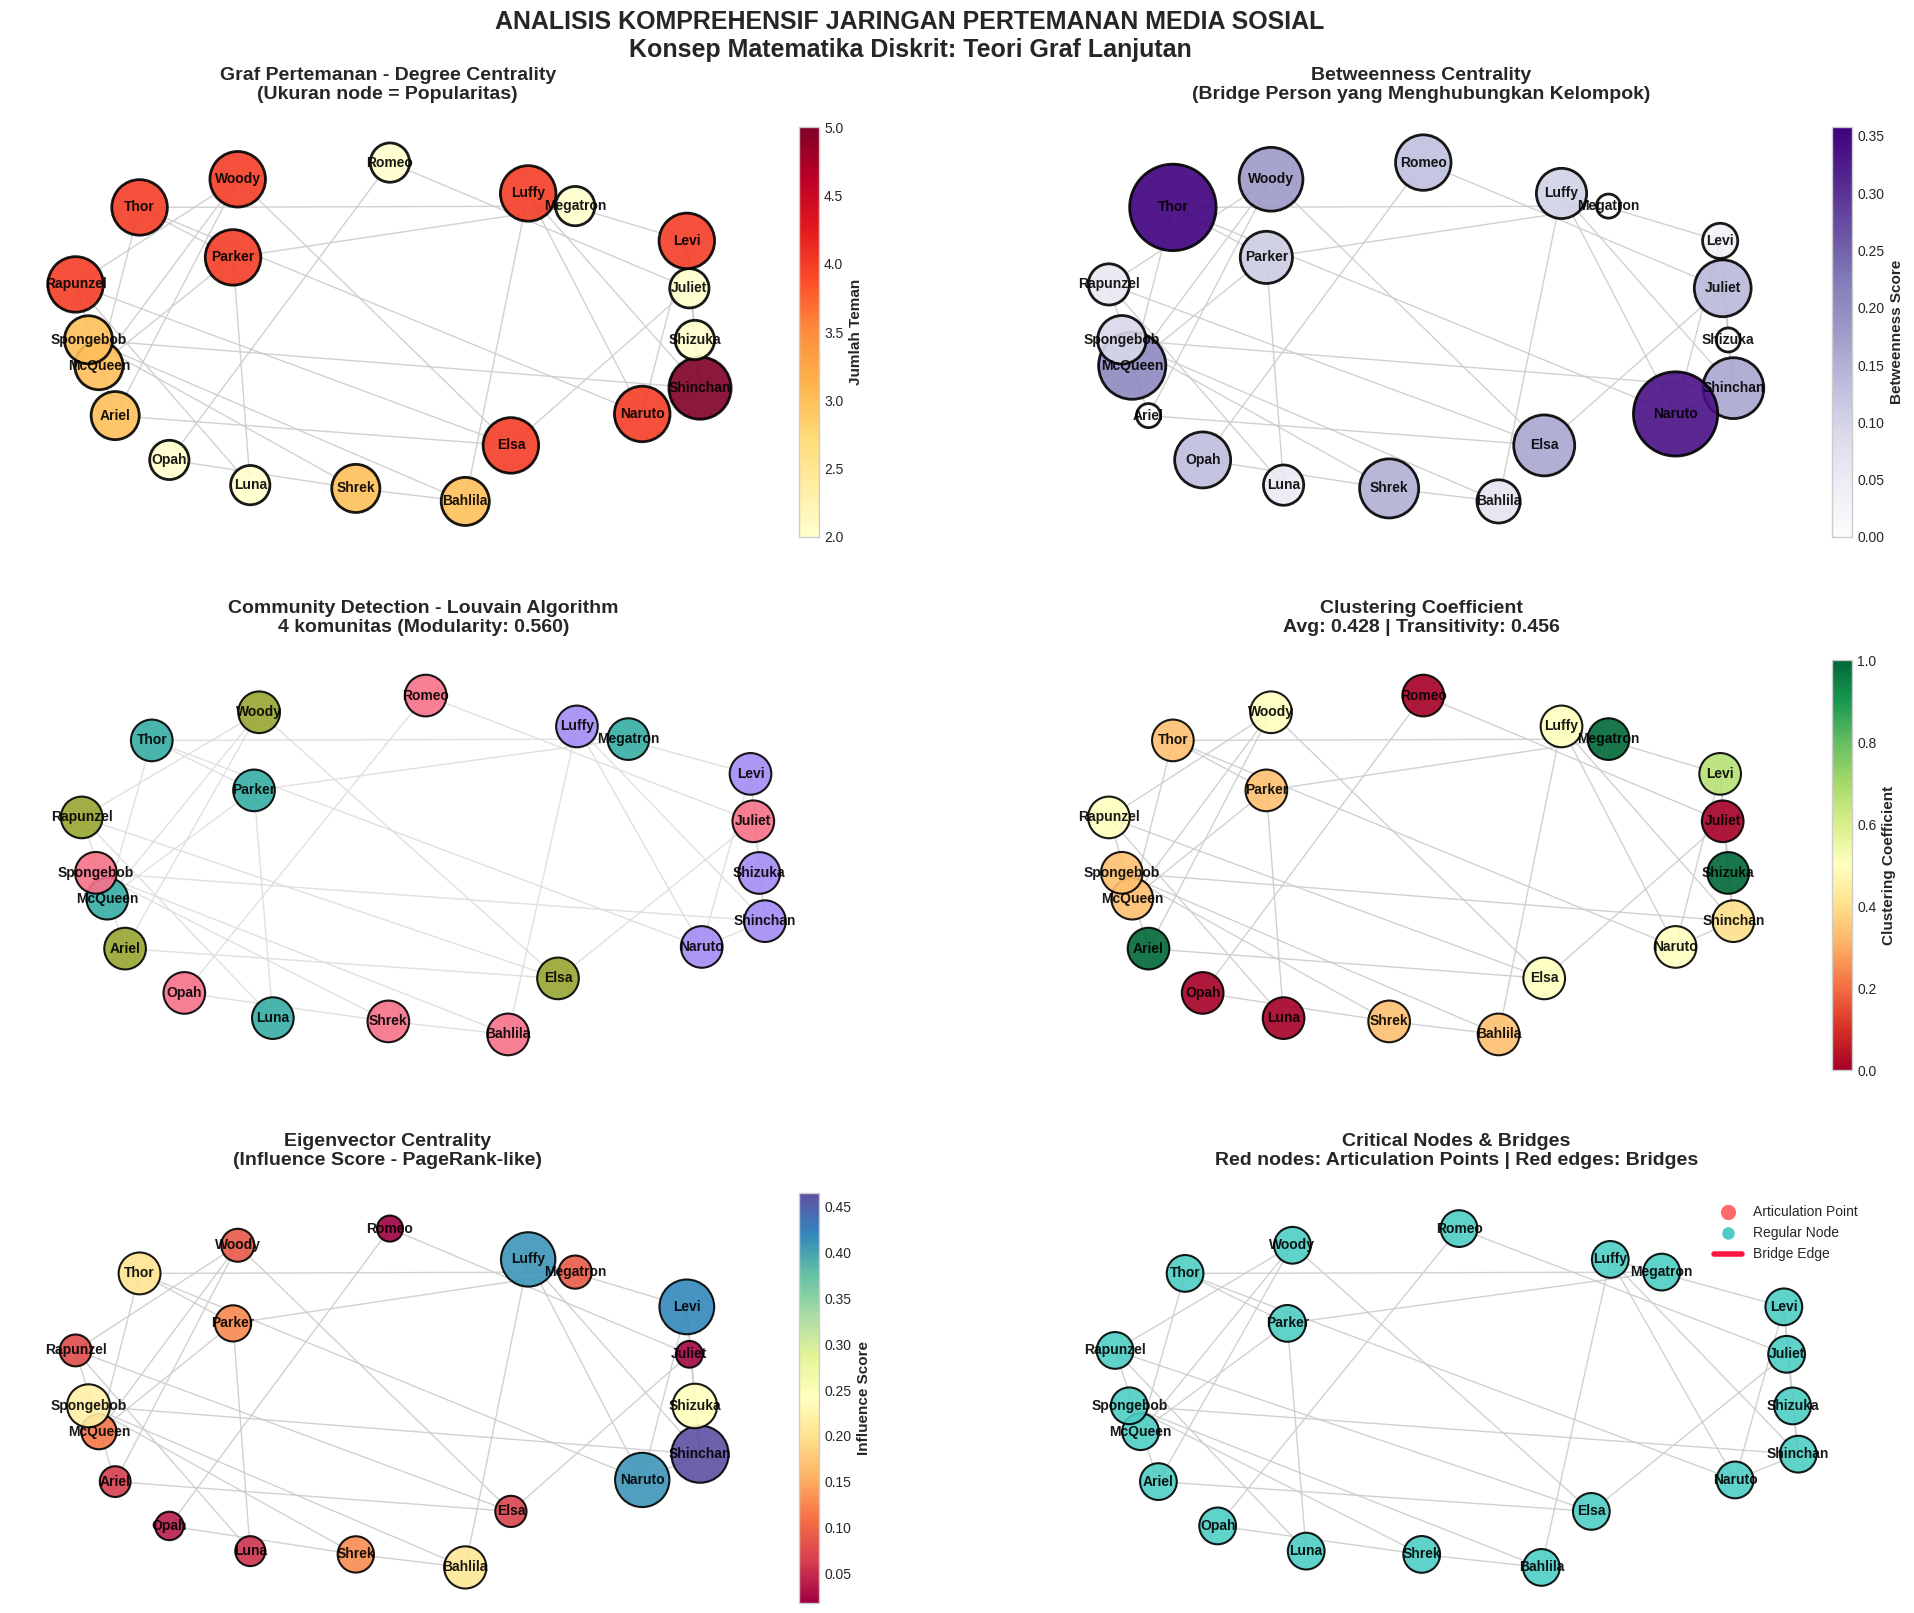

In [22]:
print("Visualisasi Graf Komprehensif")

# Buat figure dengan 3x2 subplots
fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.25)

# Warna untuk visualisasi
colors_palette = sns.color_palette("husl", num_communities)

# Position layout yang konsisten
pos = nx.spring_layout(G, k=2.5, iterations=50, seed=42)

# --- Subplot 1: Basic Network with Degree Size ---
ax1 = fig.add_subplot(gs[0, 0])
node_sizes = [degrees[node] * 400 for node in G.nodes()]
node_colors_degree = [degrees[node] for node in G.nodes()]
nx.draw(G, pos, ax=ax1,
        node_color=node_colors_degree,
        node_size=node_sizes,
        cmap=plt.cm.YlOrRd,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='#CCCCCC',
        linewidths=2,
        edgecolors='black',
        alpha=0.9)
ax1.set_title('Graf Pertemanan - Degree Centrality\n(Ukuran node = Popularitas)',
              fontsize=14, fontweight='bold', pad=20)
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd,
                            norm=plt.Normalize(vmin=min(degrees.values()),
                                             vmax=max(degrees.values())))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, fraction=0.046, pad=0.04)
cbar.set_label('Jumlah Teman', fontsize=11, fontweight='bold')

# --- Subplot 2: Betweenness Centrality (Bridge Person) ---
ax2 = fig.add_subplot(gs[0, 1])
betweenness_sizes = [betweenness[node] * 10000 + 300 for node in G.nodes()]
betweenness_colors = [betweenness[node] for node in G.nodes()]
nx.draw(G, pos, ax=ax2,
        node_color=betweenness_colors,
        node_size=betweenness_sizes,
        cmap=plt.cm.Purples,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='#CCCCCC',
        linewidths=2,
        edgecolors='black',
        alpha=0.9)
ax2.set_title('Betweenness Centrality\n(Bridge Person yang Menghubungkan Kelompok)',
              fontsize=14, fontweight='bold', pad=20)
sm2 = plt.cm.ScalarMappable(cmap=plt.cm.Purples,
                             norm=plt.Normalize(vmin=0,
                                              vmax=max(betweenness.values())))
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax2, fraction=0.046, pad=0.04)
cbar2.set_label('Betweenness Score', fontsize=11, fontweight='bold')

# --- Subplot 3: Community Detection ---
ax3 = fig.add_subplot(gs[1, 0])
community_colors = [colors_palette[communities[node]] for node in G.nodes()]
nx.draw(G, pos, ax=ax3,
        node_color=community_colors,
        node_size=900,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='#DDDDDD',
        linewidths=1.5,
        edgecolors='black',
        alpha=0.9)
ax3.set_title(f'Community Detection - Louvain Algorithm\n{num_communities} komunitas (Modularity: {modularity:.3f})',
              fontsize=14, fontweight='bold', pad=20)

# --- Subplot 4: Clustering Coefficient ---
ax4 = fig.add_subplot(gs[1, 1])
clustering_colors = [clustering[node] for node in G.nodes()]
nx.draw(G, pos, ax=ax4,
        node_color=clustering_colors,
        node_size=900,
        cmap=plt.cm.RdYlGn,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='#CCCCCC',
        linewidths=1.5,
        edgecolors='black',
        alpha=0.9)
ax4.set_title(f'Clustering Coefficient\nAvg: {avg_clustering:.3f} | Transitivity: {transitivity:.3f}',
              fontsize=14, fontweight='bold', pad=20)
sm3 = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn,
                             norm=plt.Normalize(vmin=0, vmax=1))
sm3.set_array([])
cbar3 = plt.colorbar(sm3, ax=ax4, fraction=0.046, pad=0.04)
cbar3.set_label('Clustering Coefficient', fontsize=11, fontweight='bold')

# --- Subplot 5: Eigenvector Centrality (Influence) ---
ax5 = fig.add_subplot(gs[2, 0])
eigenvector_colors = [eigenvector[node] for node in G.nodes()]
eigenvector_sizes = [(eigenvector[node] * 3000) + 300 for node in G.nodes()]
nx.draw(G, pos, ax=ax5,
        node_color=eigenvector_colors,
        node_size=eigenvector_sizes,
        cmap=plt.cm.Spectral,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='#CCCCCC',
        linewidths=1.5,
        edgecolors='black',
        alpha=0.9)
ax5.set_title('Eigenvector Centrality\n(Influence Score - PageRank-like)',
              fontsize=14, fontweight='bold', pad=20)
sm4 = plt.cm.ScalarMappable(cmap=plt.cm.Spectral,
                             norm=plt.Normalize(vmin=min(eigenvector.values()),
                                              vmax=max(eigenvector.values())))
sm4.set_array([])
cbar4 = plt.colorbar(sm4, ax=ax5, fraction=0.046, pad=0.04)
cbar4.set_label('Influence Score', fontsize=11, fontweight='bold')

# --- Subplot 6: Critical Nodes & Bridges ---
ax6 = fig.add_subplot(gs[2, 1])
# Warna node: merah untuk articulation points, biru untuk yang lain
node_colors_critical = ['#FF6B6B' if node in articulation_points else '#4ECDC4'
                        for node in G.nodes()]
node_sizes_critical = [1200 if node in articulation_points else 700
                       for node in G.nodes()]

nx.draw(G, pos, ax=ax6,
        node_color=node_colors_critical,
        node_size=node_sizes_critical,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='#CCCCCC',
        linewidths=1.5,
        edgecolors='black',
        alpha=0.9)

# Highlight bridges dengan warna merah
if bridges:
    nx.draw_networkx_edges(G, pos, edgelist=bridges,
                           edge_color='#FF1744', width=4,
                           alpha=0.8, ax=ax6)

ax6.set_title(f'Critical Nodes & Bridges\nRed nodes: Articulation Points | Red edges: Bridges',
              fontsize=14, fontweight='bold', pad=20)

# Legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF6B6B',
               markersize=12, label='Articulation Point'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#4ECDC4',
               markersize=10, label='Regular Node'),
    plt.Line2D([0], [0], color='#FF1744', linewidth=4, label='Bridge Edge')
]
ax6.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Main title
fig.suptitle('ANALISIS KOMPREHENSIF JARINGAN PERTEMANAN MEDIA SOSIAL\nKonsep Matematika Diskrit: Teori Graf Lanjutan',
             fontsize=18, fontweight='bold', y=0.995)

# Gunakan subplots_adjust untuk menghindari warning tight_layout
plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.25)
plt.show()

Visualisasi Distribusi Degree


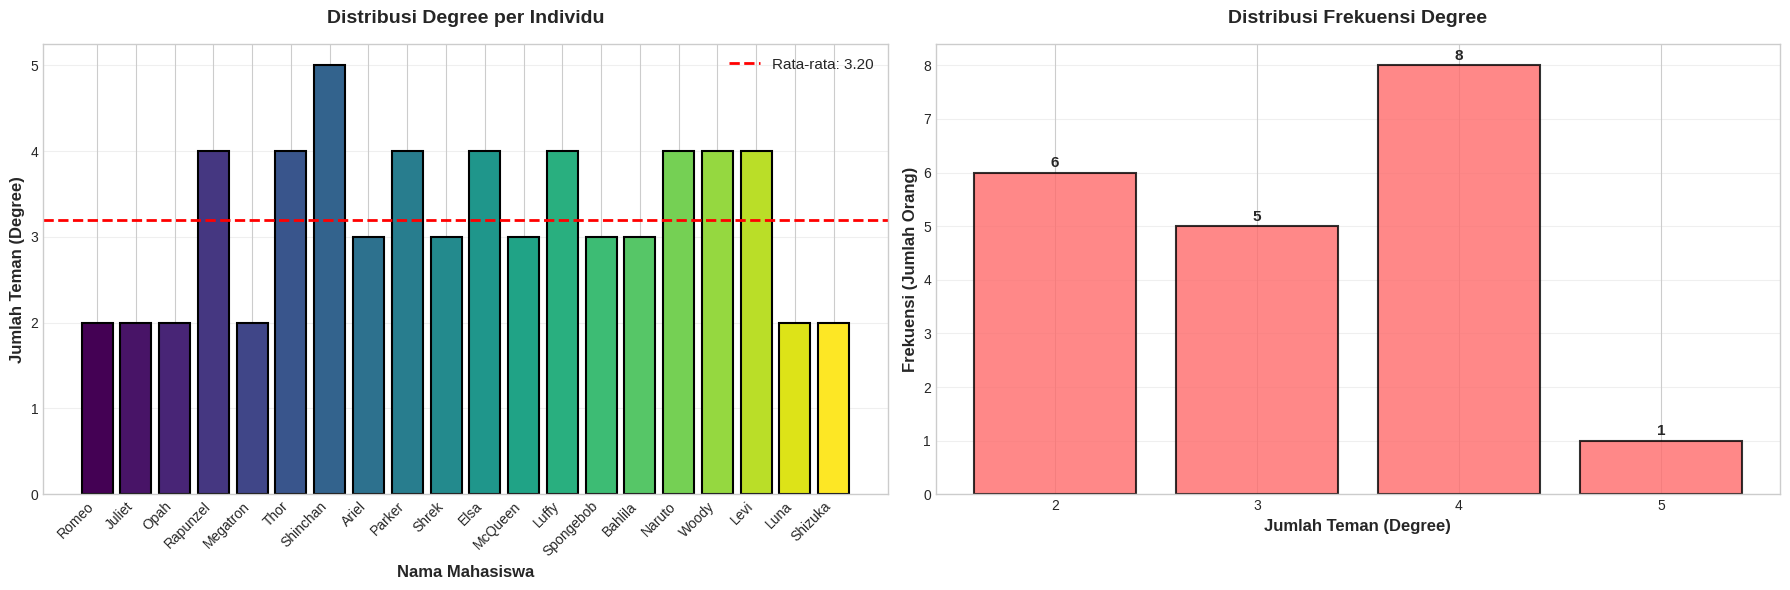

In [21]:
print("Visualisasi Distribusi Degree")

fig2, (ax_bar, ax_hist) = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart of individual degrees
names = list(degrees.keys())
deg_values = list(degrees.values())
colors_bar = plt.cm.viridis(np.linspace(0, 1, len(names)))

# Pastikan urutan nama sesuai dengan nilai
bars = ax_bar.bar(range(len(names)), deg_values, color=colors_bar, edgecolor='black', linewidth=1.5)
ax_bar.set_xticks(range(len(names)))
ax_bar.set_xticklabels(names, rotation=45, ha='right', fontsize=10)
ax_bar.set_ylabel('Jumlah Teman (Degree)', fontsize=12, fontweight='bold')
ax_bar.set_xlabel('Nama Mahasiswa', fontsize=12, fontweight='bold')
ax_bar.set_title('Distribusi Degree per Individu', fontsize=14, fontweight='bold', pad=15)
ax_bar.grid(axis='y', alpha=0.3)
ax_bar.axhline(y=np.mean(deg_values), color='red', linestyle='--', linewidth=2, label=f'Rata-rata: {np.mean(deg_values):.2f}')
ax_bar.legend(fontsize=11)

# Histogram of degree distribution - perbaiki di sini
degree_count = Counter(deg_values)
degree_freq = sorted(degree_count.keys())  # Urutkan degree values
freq_count = [degree_count[deg] for deg in degree_freq]  # Ambil count sesuai urutan

ax_hist.bar(degree_freq, freq_count, color='#FF6B6B', edgecolor='black', linewidth=1.5, alpha=0.8)
ax_hist.set_xlabel('Jumlah Teman (Degree)', fontsize=12, fontweight='bold')
ax_hist.set_ylabel('Frekuensi (Jumlah Orang)', fontsize=12, fontweight='bold')
ax_hist.set_title('Distribusi Frekuensi Degree', fontsize=14, fontweight='bold', pad=15)
ax_hist.grid(axis='y', alpha=0.3)

# Tambahkan label nilai di atas setiap bar
for deg, count in zip(degree_freq, freq_count):
    ax_hist.text(deg, count + 0.1, str(count), ha='center', fontsize=11, fontweight='bold')

# Set x-ticks untuk histogram agar lebih jelas
ax_hist.set_xticks(degree_freq)

plt.tight_layout()
plt.show()

KESIMPULAN

Analisis jaringan pertemanan media sosial ini mendemonstrasikan penerapan konsep matematika diskrit, khususnya teori graf, dalam memahami dinamika sosial di kehidupan nyata. Dari 20 mahasiswa dengan 32 koneksi pertemanan, teridentifikasi bahwa Shinchan merupakan individu paling populer dengan 5 teman (degree centrality tertinggi), sementara Thor memiliki peran krusial sebagai penghubung antar kelompok (betweenness centrality 0.358). Jaringan ini membentuk 4 komunitas alami dengan modularity score 0.560, menunjukkan pembagian kelompok yang jelas berdasarkan kesamaan minat (Anime Lovers, Disney Fans, Action Heroes, dan Comedy Squad). Meskipun network density relatif rendah (0.168), jaringan tetap terhubung dengan baik tanpa articulation points, mengindikasikan struktur yang cukup robust. Average clustering coefficient 0.428 dan rata-rata derajat perpisahan 3.23 langkah menunjukkan karakteristik "small world network" di mana informasi dapat menyebar dengan cepat melalui jalur-jalur pendek. Eigenvector centrality mengungkapkan bahwa influence seseorang tidak hanya ditentukan oleh jumlah teman, tetapi juga oleh kualitas koneksi mereka, di mana Shinchan, Levi, dan Luffy memiliki influence score tertinggi karena terhubung dengan individu-individu influential lainnya. Analisis ini membuktikan bahwa konsep-konsep matematika diskrit seperti graf theory, shortest path algorithm, clustering coefficient, dan community detection algorithm dapat diaplikasikan secara efektif untuk memahami struktur sosial, memprediksi penyebaran informasi, mengidentifikasi key influencers, dan mengoptimalkan strategi networking—sebuah fondasi yang sama digunakan oleh platform media sosial seperti Facebook, Instagram, dan LinkedIn dalam mengembangkan fitur-fitur mereka seperti "People You May Know" dan sistem rekomendasi konten.